In [1]:
import polars as pl
import pandas as pd
import glob
import os

paths_and_dfs = {}
for file in glob.glob("/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/code*.parquet"):
    if "livecodebench" in file.lower():
        df = pl.read_parquet(file).to_pandas()
    else:
        df = pd.read_parquet(file)
    paths_and_dfs[file] = df

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_primeintellect_9.6k_l1e-5_h0.9_7.6k_sampled_1.0k.parquet
Number of rows: 1041


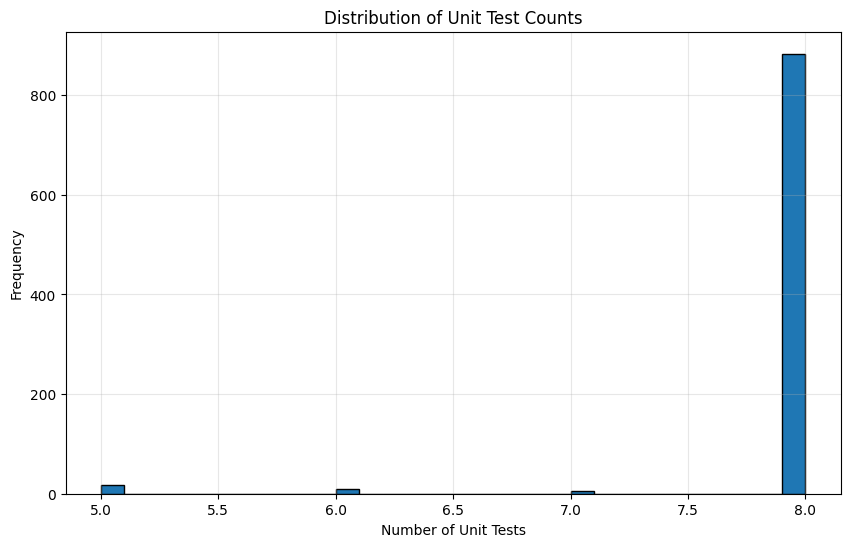

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_taco_11.1k_l1e-5_h0.9_8.9k_sampled_1.2k.parquet
Number of rows: 1218


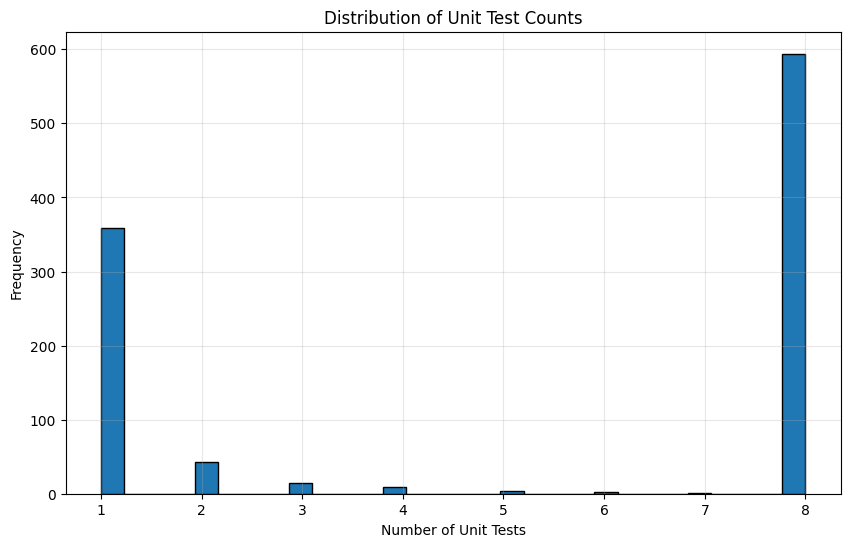

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_livecodebench_599_l1e-5_h0.9_451_sampled_61.parquet
Number of rows: 61


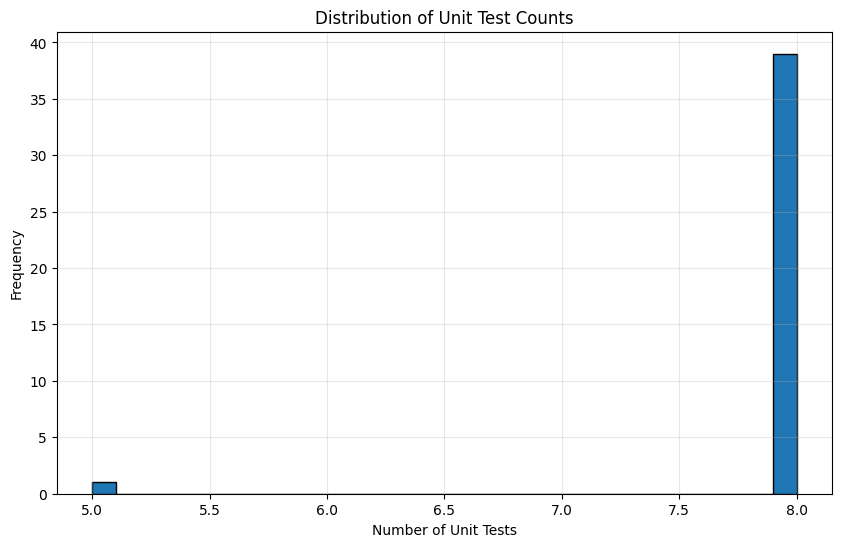

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_leetcode2k_2.4k_l1e-5_h0.9_1.3k_sampled_177.parquet
Number of rows: 177


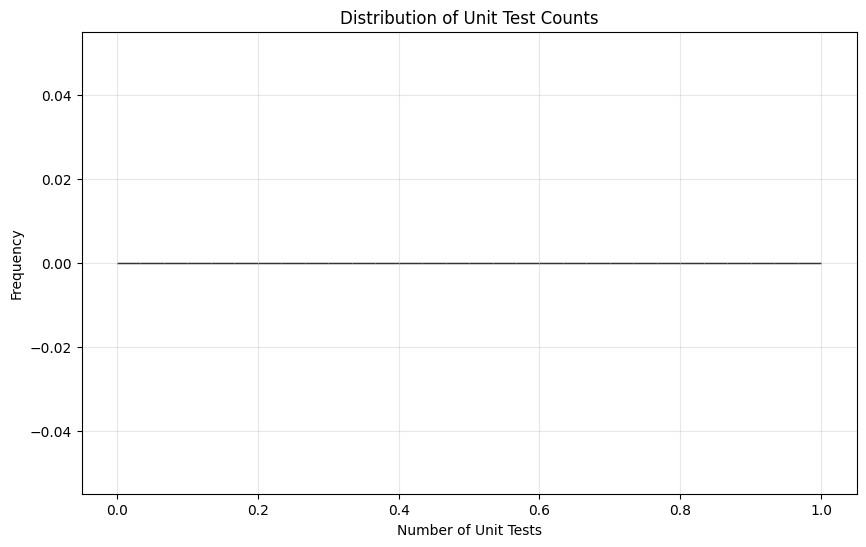

In [3]:
import json
import matplotlib.pyplot as plt

for key, df in paths_and_dfs.items():
    print(key)
    print(f"Number of rows: {len(df)}")
    unit_test_counts, all_unit_test_counts = [], []
    for i in range(len(df)):
        ground_truth = json.loads(df['reward_model'][i]['ground_truth'])
        if 'inputs' in ground_truth:
            assert len(ground_truth['inputs']) == len(ground_truth['outputs'])
            unit_test_counts.append(len(ground_truth['inputs']))
            all_unit_test_counts.append(len(ground_truth['inputs']))
    
    # distribution of the unit test counts
    plt.figure(figsize=(10, 6))
    plt.hist(unit_test_counts, bins=30, edgecolor='black')
    plt.title('Distribution of Unit Test Counts')
    plt.xlabel('Number of Unit Tests')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()


In [4]:
import numpy as np

for key, df in paths_and_dfs.items():
    print(f"\nProcessing: {os.path.basename(key)}")
    
    # Set seed for reproducibility 
    np.random.seed(42)
    
    for idx in range(len(df)):
        ground_truth = json.loads(df['reward_model'][idx]['ground_truth'])
        if 'inputs' in ground_truth and len(ground_truth['inputs']) > 0:
            # Store complete inputs/outputs in ground truth
            complete_inputs = ground_truth['inputs']
            complete_outputs = ground_truth['outputs']
            
            # Get 8 random indices from this test case's inputs/outputs
            n_tests = len(complete_inputs)
            sample_indices = np.random.choice(n_tests, min(8, n_tests), replace=False)
            
            # Update ground truth with sampled data while preserving complete data
            ground_truth['complete_inputs'] = complete_inputs
            ground_truth['complete_outputs'] = complete_outputs
            ground_truth['inputs'] = [complete_inputs[i] for i in sample_indices]
            ground_truth['outputs'] = [complete_outputs[i] for i in sample_indices]
            
            df.at[idx, 'reward_model']['ground_truth'] = json.dumps(ground_truth)
    
    # Update the dictionary with modified dataframe
    paths_and_dfs[key] = df



Processing: codegen__deduped_primeintellect_9.6k_l1e-5_h0.9_7.6k_sampled_1.0k.parquet

Processing: codegen__deduped_taco_11.1k_l1e-5_h0.9_8.9k_sampled_1.2k.parquet

Processing: codegen__deduped_livecodebench_599_l1e-5_h0.9_451_sampled_61.parquet

Processing: codegen__deduped_leetcode2k_2.4k_l1e-5_h0.9_1.3k_sampled_177.parquet


/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_primeintellect_9.6k_l1e-5_h0.9_7.6k_sampled_1.0k.parquet
Number of rows: 1041


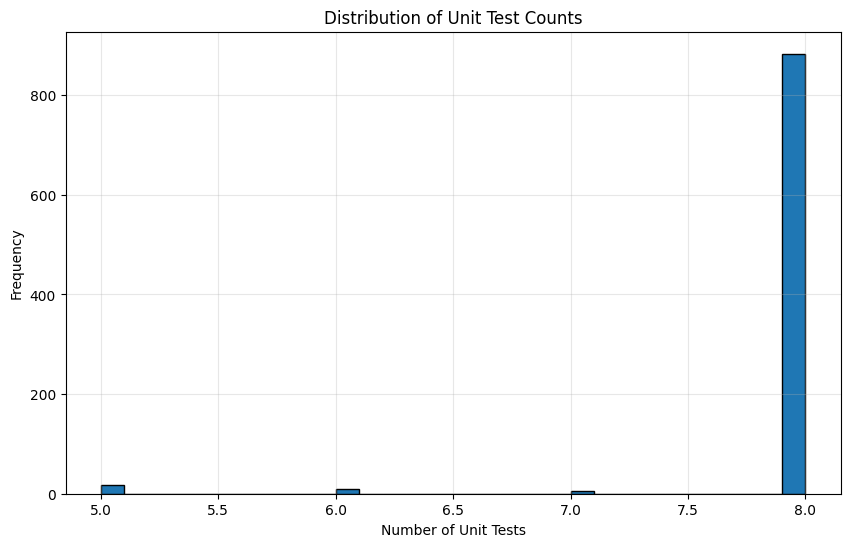

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_taco_11.1k_l1e-5_h0.9_8.9k_sampled_1.2k.parquet
Number of rows: 1218


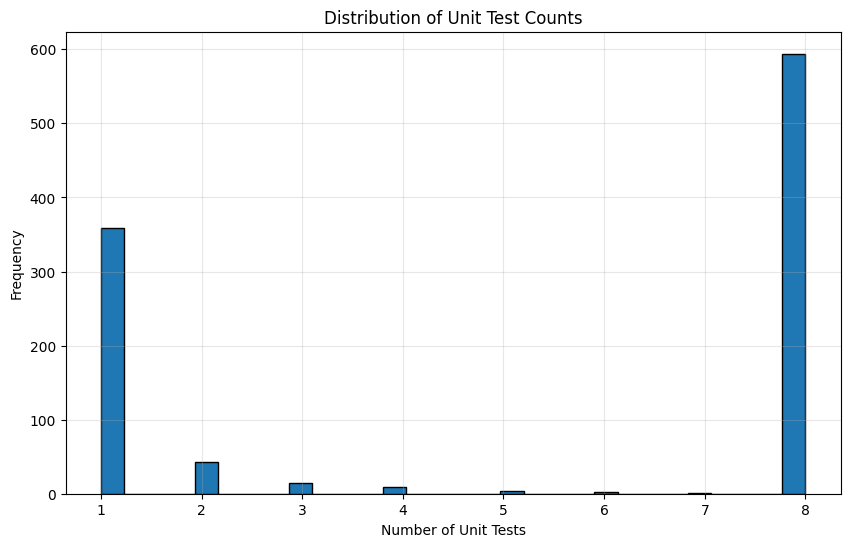

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_livecodebench_599_l1e-5_h0.9_451_sampled_61.parquet
Number of rows: 61


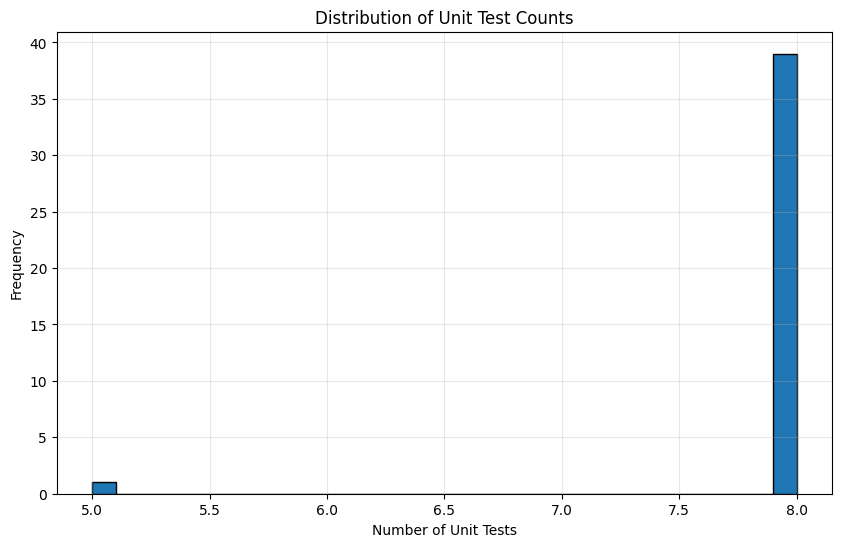

/lustrefs/users/zhuojun.cheng/Reasoning360/data/train_guru15k/codegen__deduped_leetcode2k_2.4k_l1e-5_h0.9_1.3k_sampled_177.parquet
Number of rows: 177


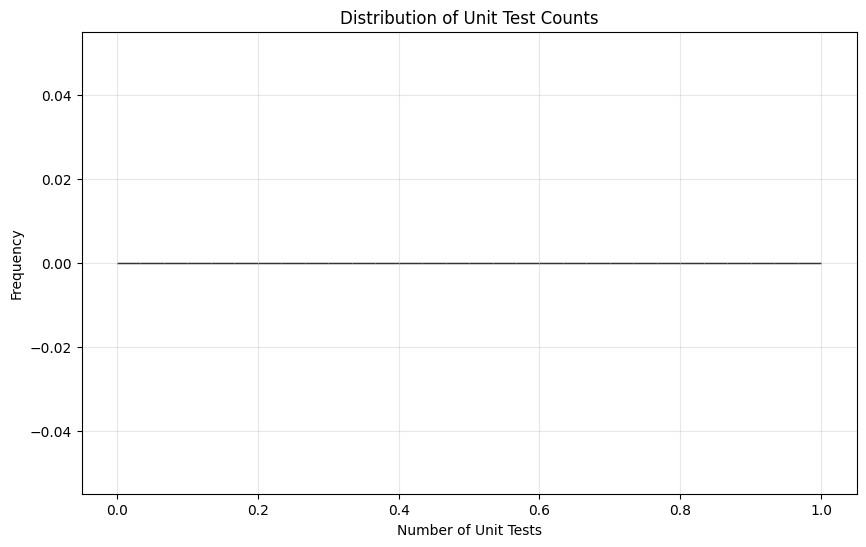

In [ ]:
import json
import matplotlib.pyplot as plt

for key, df in paths_and_dfs.items():
    print(key)
    print(f"Number of rows: {len(df)}")
    unit_test_counts = []
    for i in range(len(df)):
        ground_truth = json.loads(df['reward_model'][i]['ground_truth'])
        if 'inputs' in ground_truth:
            unit_test_counts.append(len(ground_truth['inputs']))
    
    # distribution of the unit test counts
    plt.figure(figsize=(10, 6))
    plt.hist(unit_test_counts, bins=30, edgecolor='black')
    plt.title('Distribution of Unit Test Counts')
    plt.xlabel('Number of Unit Tests')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()


In [ ]:
# save the df back to parquet
for key, df in paths_and_dfs.items():
    df.to_parquet(key)